<a href="https://colab.research.google.com/github/Nadyaulia/Capstone/blob/main/deploy/Capstone4_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROSES EDA**

# **Import Library**

In [62]:
import pandas as pd #manipulasi dan analisis data
import numpy as np
import seaborn as sns # visualisasi data
import matplotlib.pyplot as plt # visualisasi data

# **Load Dataset**

In [63]:
df = pd.read_csv('/content/ObesityDataSet.csv')
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# **Informasi Dataset**

In [64]:
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 2111
Jumlah Kolom: 17


In [65]:
# Konversi ke numerik
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [66]:
#menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             20

# **Cek missing values**

In [67]:
print(df.isnull().sum())

Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


# **Cek nilai unik per kolom**

In [68]:
print("Unique values per column:")
print(df.nunique())

Unique values per column:
Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


# **Cek data duplikat**

In [69]:
print(df.duplicated().sum())

18


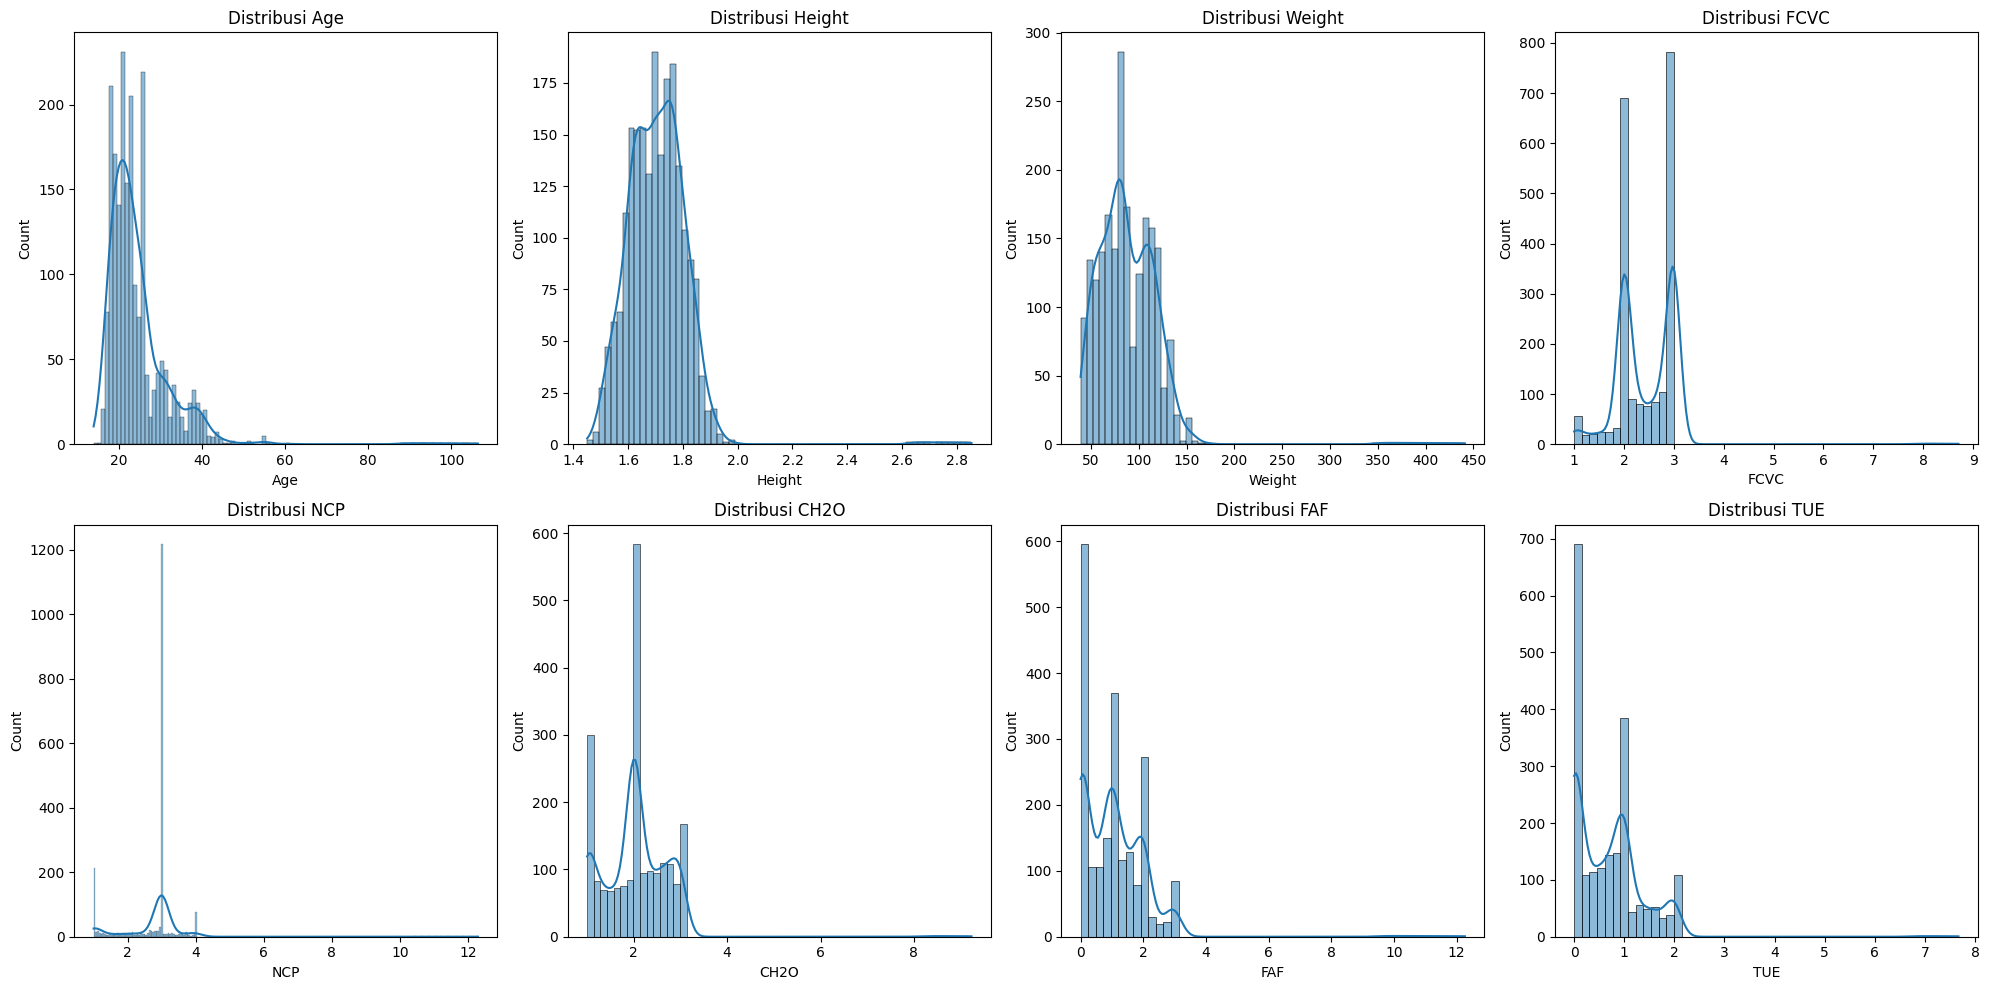

In [70]:
# Histogram
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

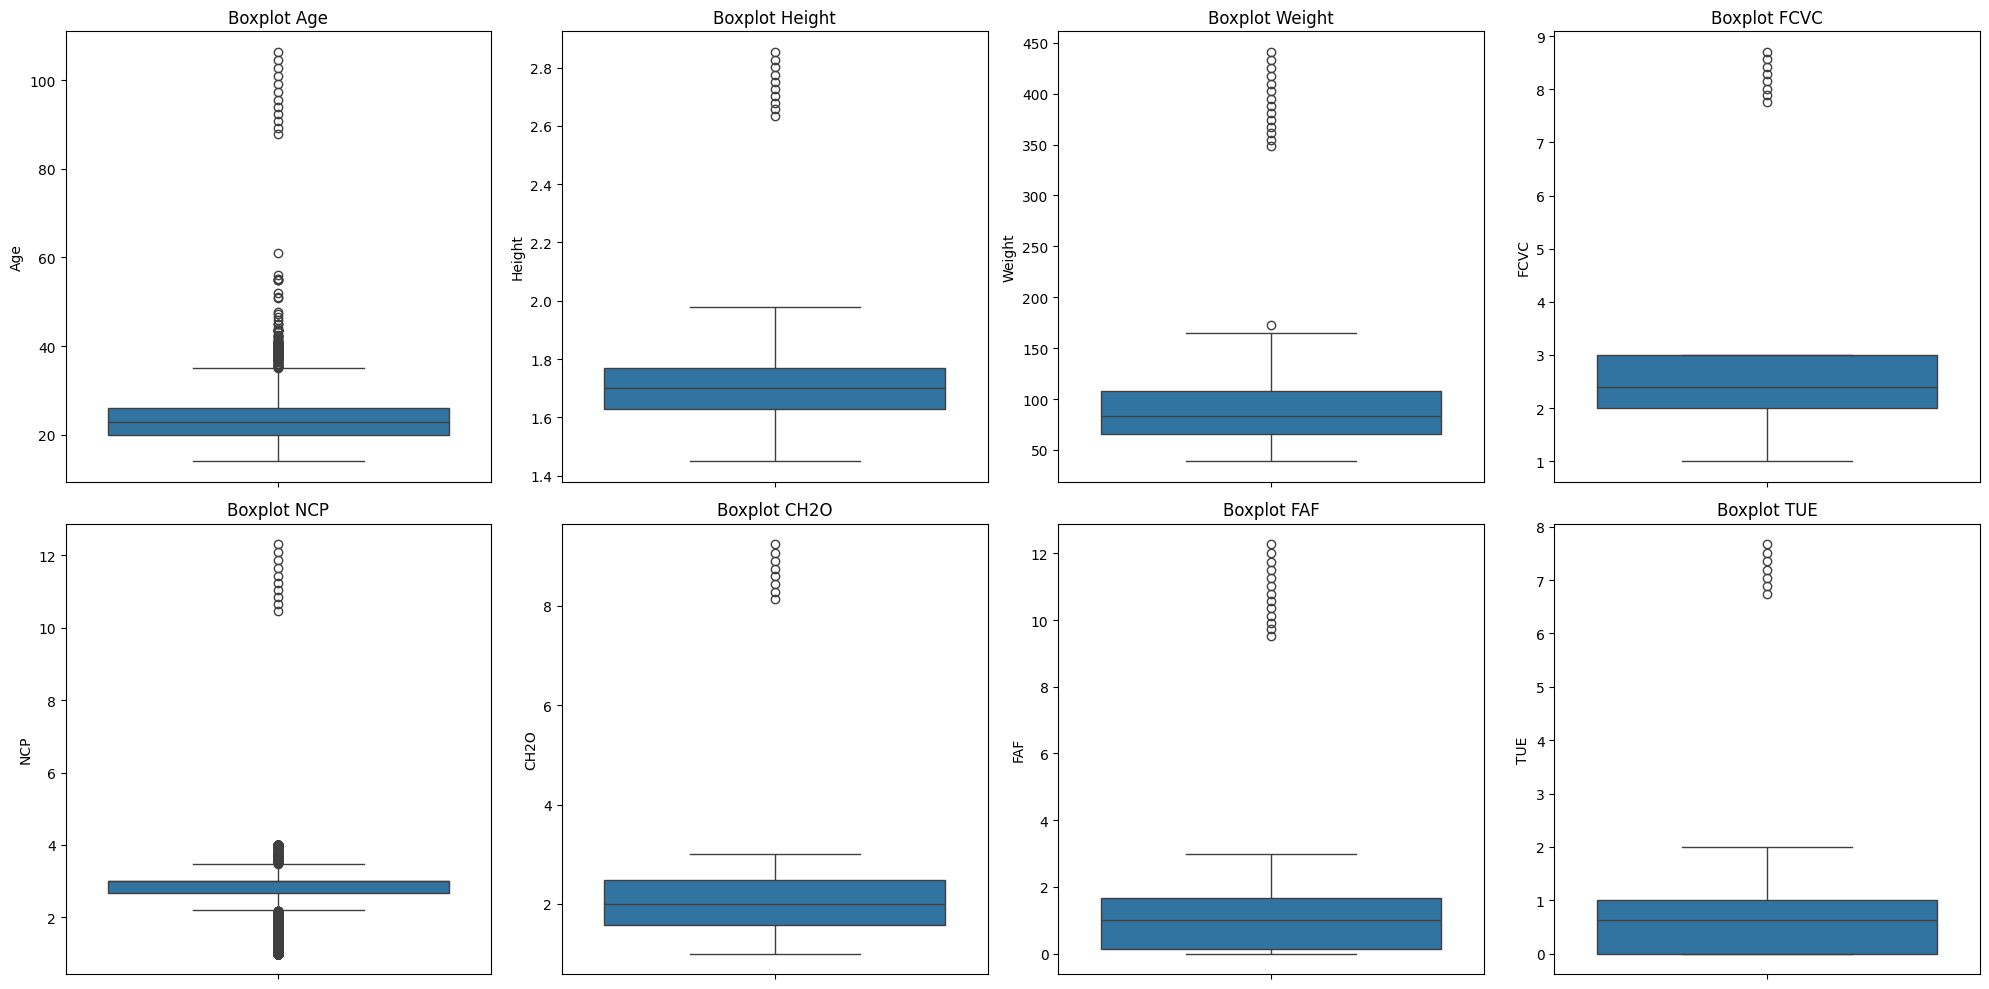

In [71]:
# Boxplot
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

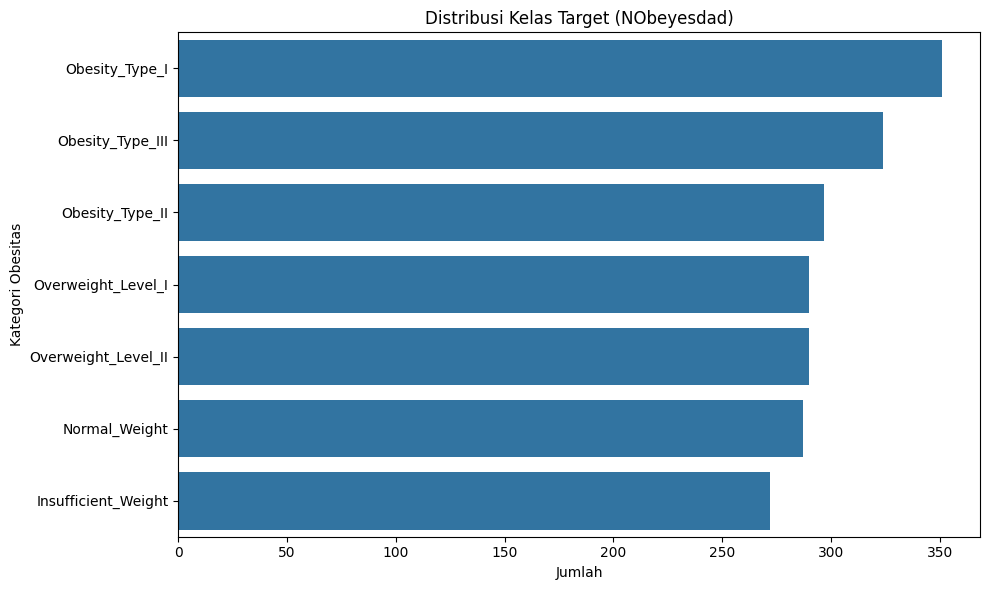

In [72]:
# Distribusi kelas target
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Obesitas')
plt.tight_layout()
plt.show()

### Kesimpulan EDA
- Dataset terdiri dari 17 fitur dan 2111 baris awal.
- Terdapat missing values dan duplikasi
- Data bersifat campuran antara numerik dan kategorikal.
- Ditemukan beberapa outlier
- Kelas target (`NObeyesdad`) sedikit tidak seimbang.
- Visualisasi menunjukkan variasi data yang baik untuk dilanjutkan ke modeling.


# **PROSES PREPOCESSING DATA**

# **Cek Missing Value**

In [73]:
print(df.isnull().sum())

Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


# **Mengatasi Missing Value**

In [74]:
# Pilih kolom numerik (tipe int/float)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Isi missing value numerik dengan median karena lebih tahan outlier
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)


In [75]:
# Pilih kolom kategorikal (tipe object)
cat_cols = df.select_dtypes(include='object').columns

# Isi missing value kategorikal dengan MODUS
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col]= df[col].fillna(mode_val)

In [76]:
print( df.isnull().sum())

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


# **Data Duplikat**

In [77]:
print(df.duplicated().sum())

19


In [78]:
df = df.drop_duplicates()

In [79]:
print(df.duplicated().sum())

0


## **Outlier**

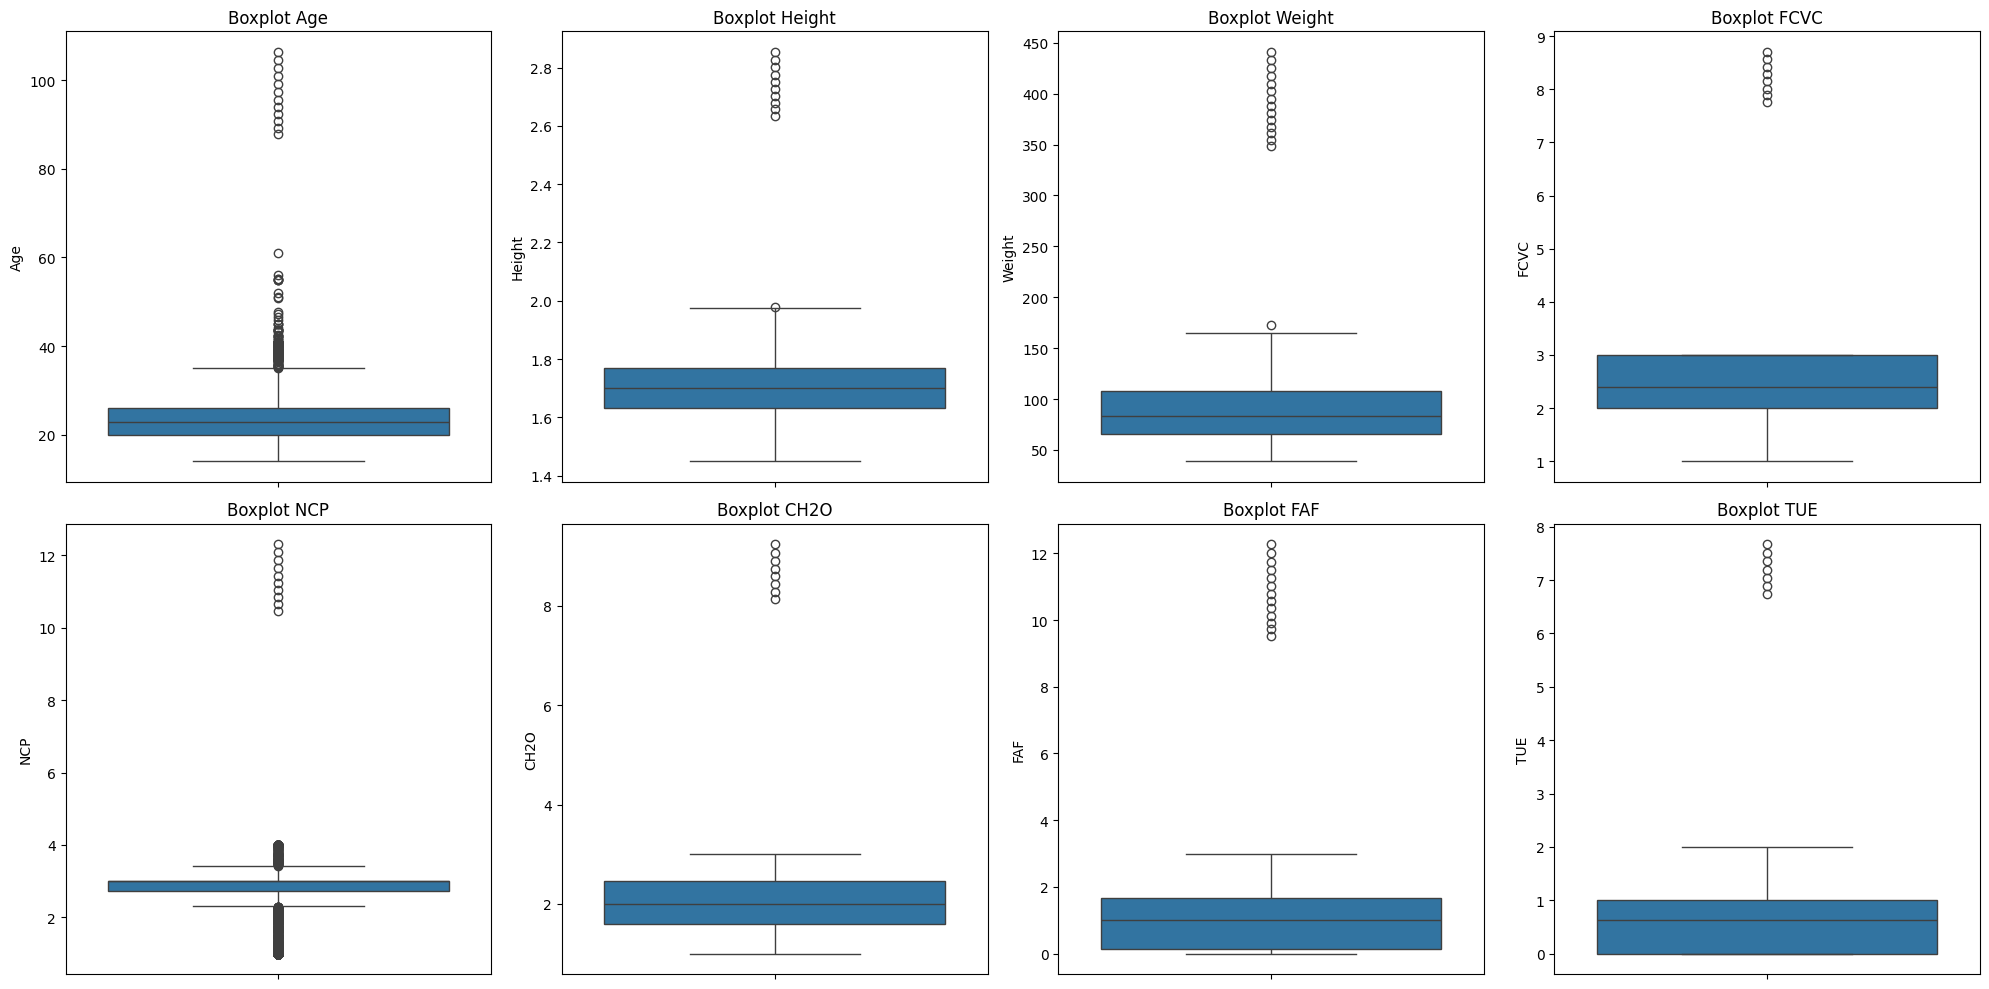

In [80]:
# Boxplot
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [81]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_before_cleaning = df.copy()

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

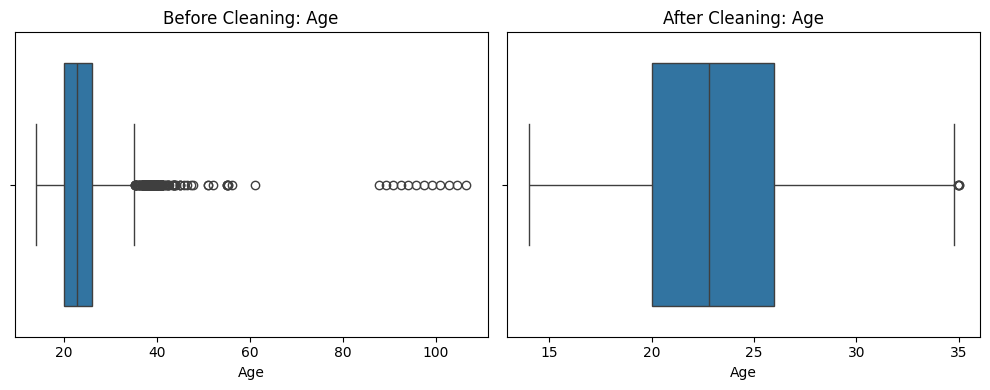

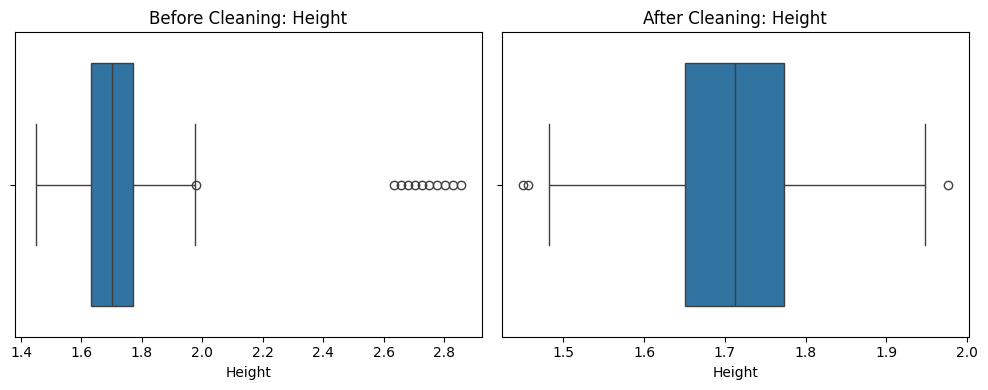

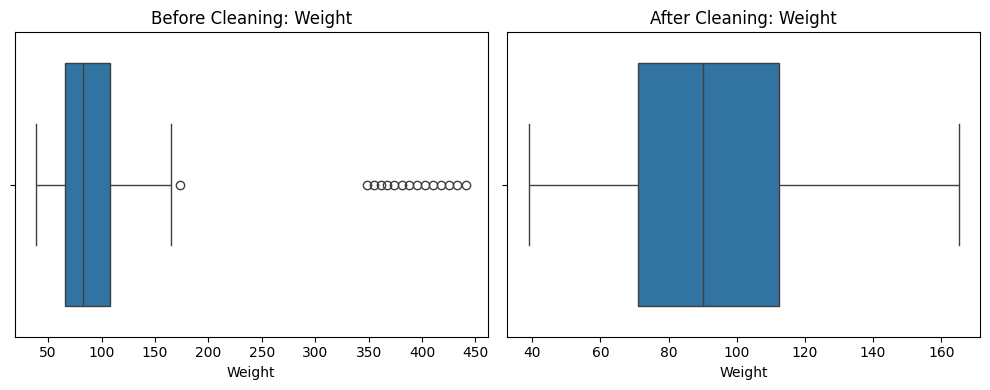

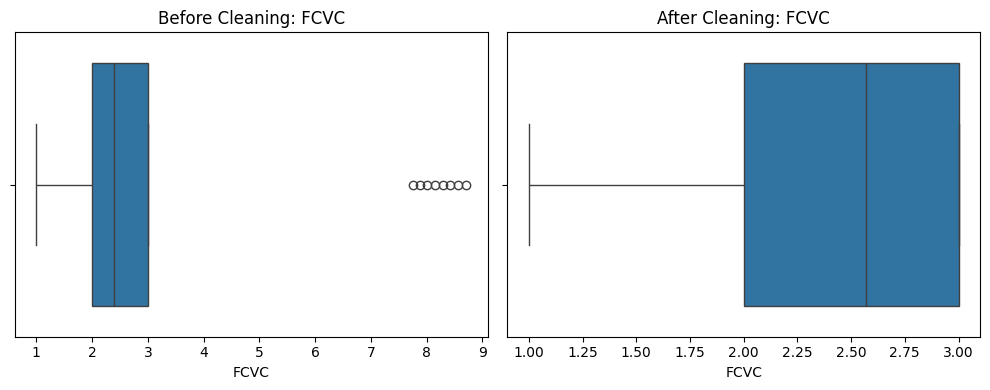

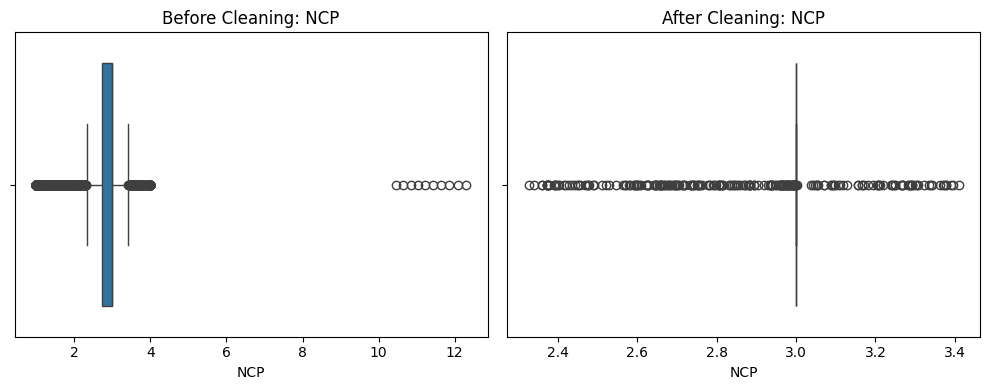

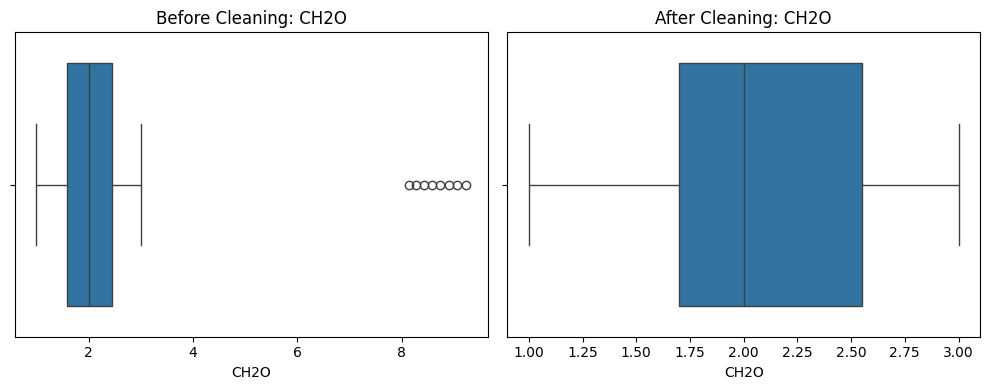

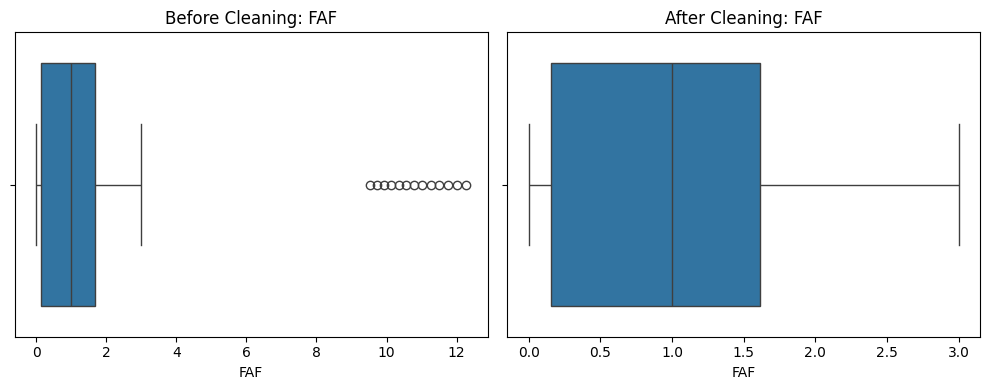

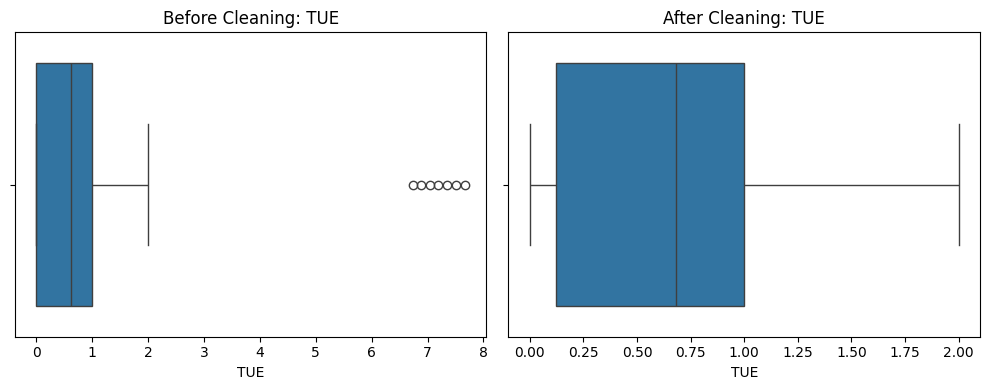

In [82]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Use the original DataFrame for the 'Before Cleaning' plot
    sns.boxplot(x=df_before_cleaning[col], ax=axes[0])
    axes[0].set_title(f"Before Cleaning: {col}")
    # Use the DataFrame after outlier removal for the 'After Cleaning' plot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"After Cleaning: {col}")
    plt.tight_layout()
    plt.show()

# **Ubah data kategori ke numerik**

In [83]:
from sklearn.preprocessing import LabelEncoder

# Salin dataset
df_encoded = df.copy()

# Pilih kolom kategorikal (object)
cat_cols = df_encoded.select_dtypes(include='object').columns
print("Kolom kategorikal:", list(cat_cols))

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Lakukan label encoding pada setiap kolom kategorikal
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


Kolom kategorikal: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [84]:
print(df_encoded.head())

    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       1    1.62    64.0     3     1   2.0  3.0    1      1   2.0   
1  21.0       1    1.52    56.0     2     1   3.0  3.0    2      2   3.0   
2  23.0       2    1.80    77.0     1     1   2.0  3.0    1      1   2.0   
3  27.0       2    1.80    87.0     1     1   3.0  3.0    1      1   2.0   
5  29.0       2    1.62    53.0     2     2   2.0  3.0    1      1   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               2  0.0  1.0     3       4           1  
1                               2  3.0  0.0     3       4           1  
2                               2  2.0  1.0     3       4           1  
3                               1  2.0  0.0     3       5           5  
5                               1  0.0  0.0     3       1           1  


# **Fitur yg digunakan**

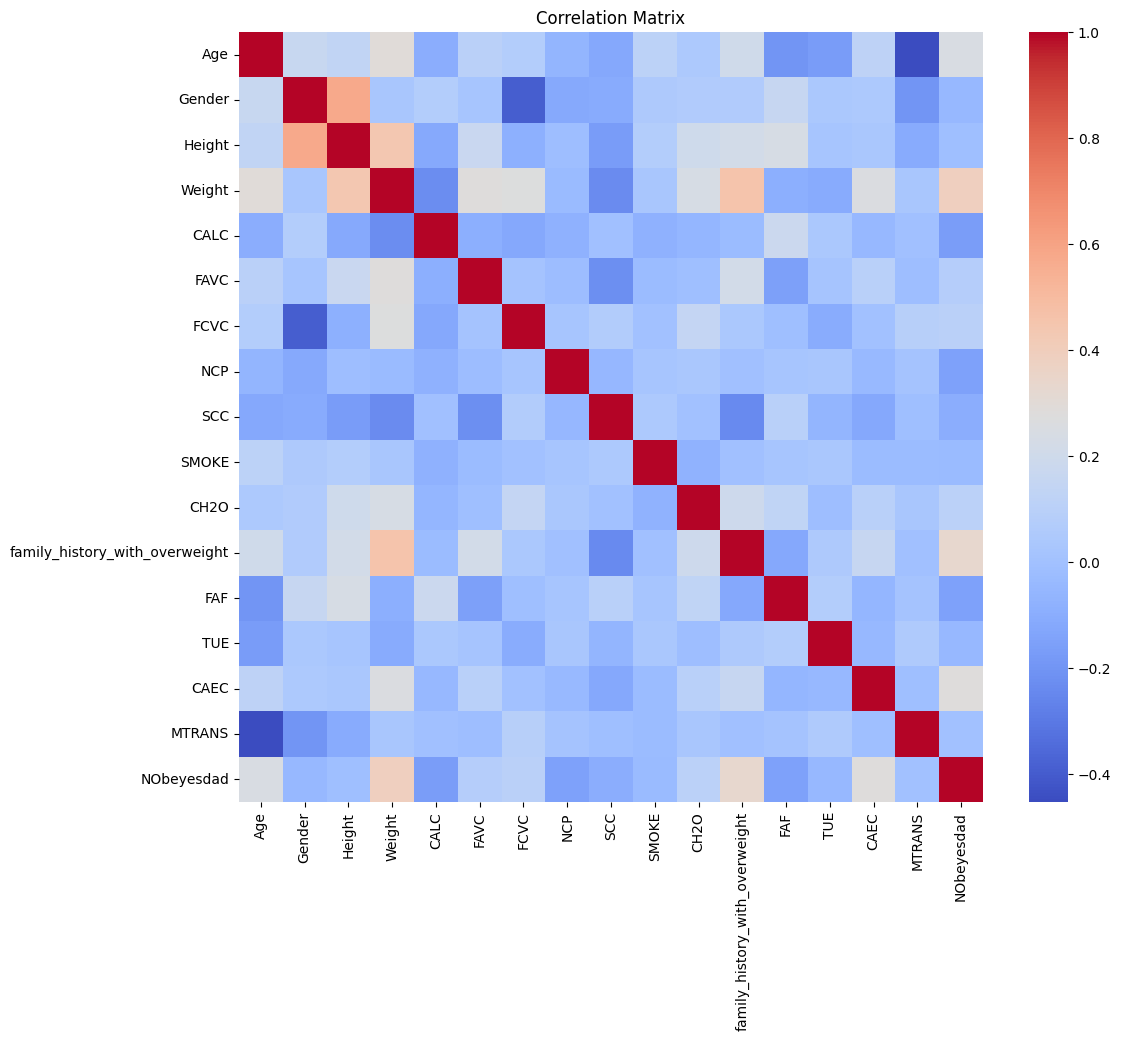

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi korelasi fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


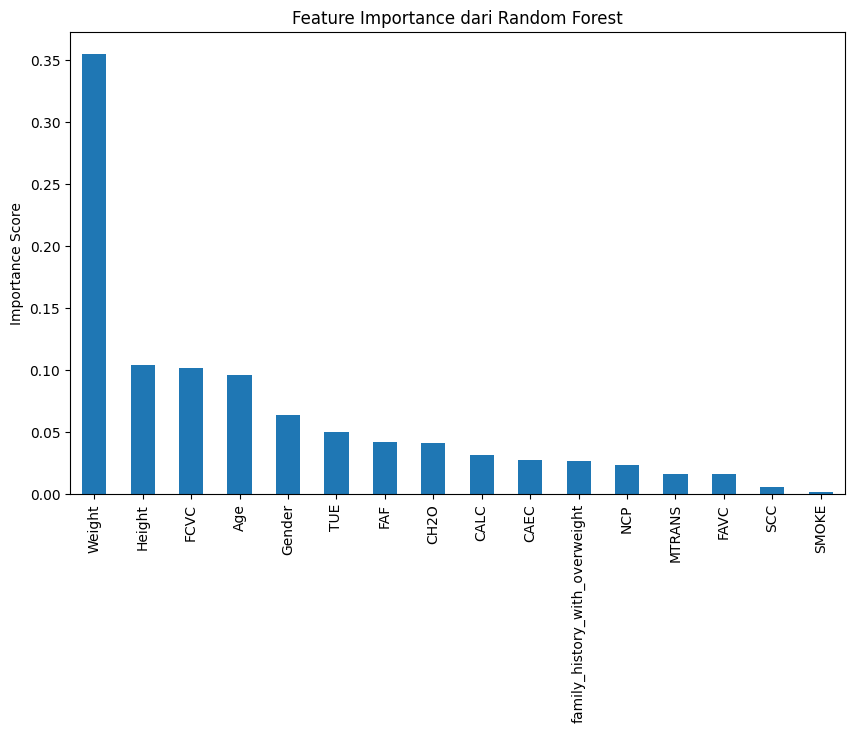

In [86]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Ambil dan tampilkan pentingnya tiap fitur
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Feature Importance dari Random Forest")
plt.ylabel("Importance Score")
plt.show()


# **Ketidakseimbangan Data**

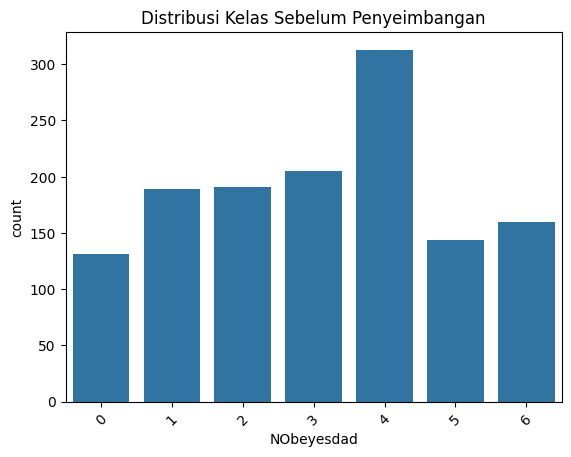

In [87]:
sns.countplot(x=df_encoded["NObeyesdad"])
plt.title("Distribusi Kelas Sebelum Penyeimbangan")
plt.xticks(rotation=45)
plt.show()


In [88]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]

# Split data agar tidak terjadi data leakage
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Misal dataset Anda adalah X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("sebelum SMOTE:", y.value_counts())
print("sesudah SMOTE:", pd.Series(y_resampled).value_counts())




sebelum SMOTE: NObeyesdad
4    313
3    205
2    191
1    189
6    160
5    144
0    131
Name: count, dtype: int64
sesudah SMOTE: NObeyesdad
4    250
0    250
3    250
1    250
2    250
5    250
6    250
Name: count, dtype: int64


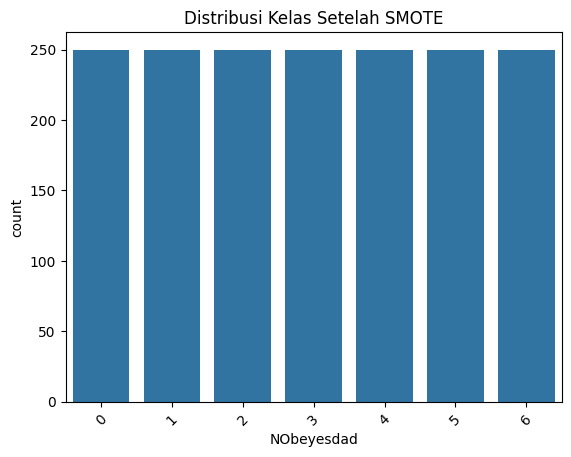

In [89]:
# Cek hasil distribusi setelah SMOTE
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()

# **Normalisasi**

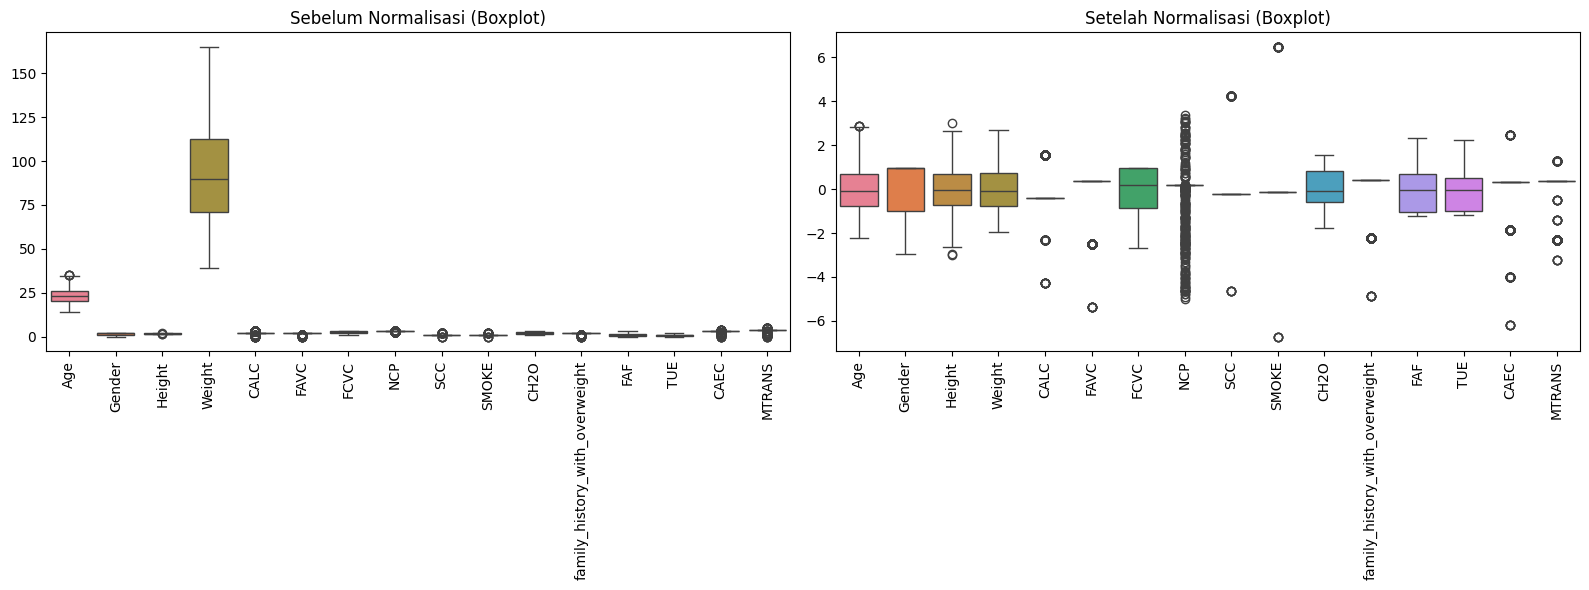

In [91]:
from sklearn.preprocessing import StandardScaler

# Fitur dan target
X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]

# Salin sebelum normalisasi
X_before = X.copy()

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_after = pd.DataFrame(X_scaled, columns=X.columns)

# Visualisasi Boxplot
plt.figure(figsize=(16, 6))

# Sebelum normalisasi
plt.subplot(1, 2, 1)
sns.boxplot(data=X_before)
plt.title("Sebelum Normalisasi (Boxplot)")
plt.xticks(rotation=90)

# Setelah normalisasi
plt.subplot(1, 2, 2)
sns.boxplot(data=X_after)
plt.title("Setelah Normalisasi (Boxplot)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# **Kesimpulan Prepocessing**

*  Missing values pada fitur numerik diisi dengan median, sedangkan fitur kategorikal diisi dengan modus.
*  Data duplikat berhasil dihapus.
*  Fitur kategorikal telah diencoding dengan LabelEncoder.
*  SMOTE diterapkan untuk mengatasi ketidakseimbangan kelas.
*  Fitur numerik dinormalisasi menggunakan StandardScaler.
*  Data siap digunakan untuk proses modeling.





# **PROSES PEMODELAN DAN EVALUASI**

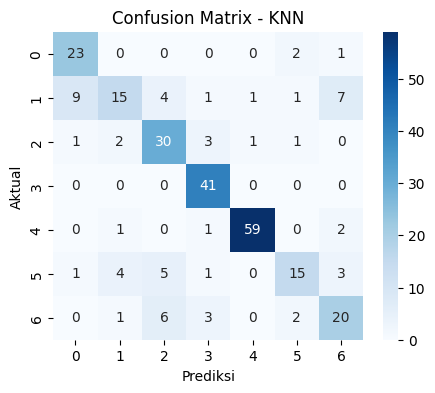

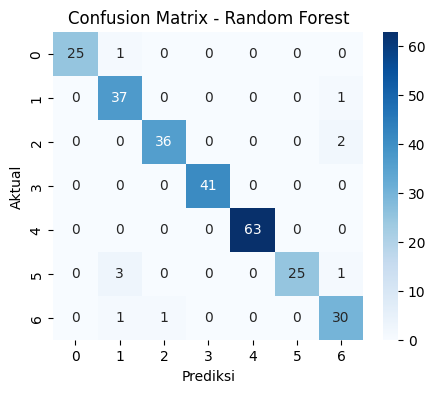

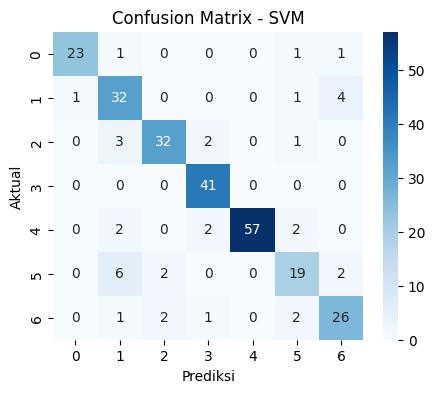

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inisialisasi model
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = []

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([name, acc, prec, rec, f1])

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

In [95]:
# Tabel dan visualisasi hasil
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.760300,0.757928,0.760300,0.749366
1,Random Forest,0.962547,0.965110,0.962547,0.962783
2,SVM,0.861423,0.867658,0.861423,0.862233


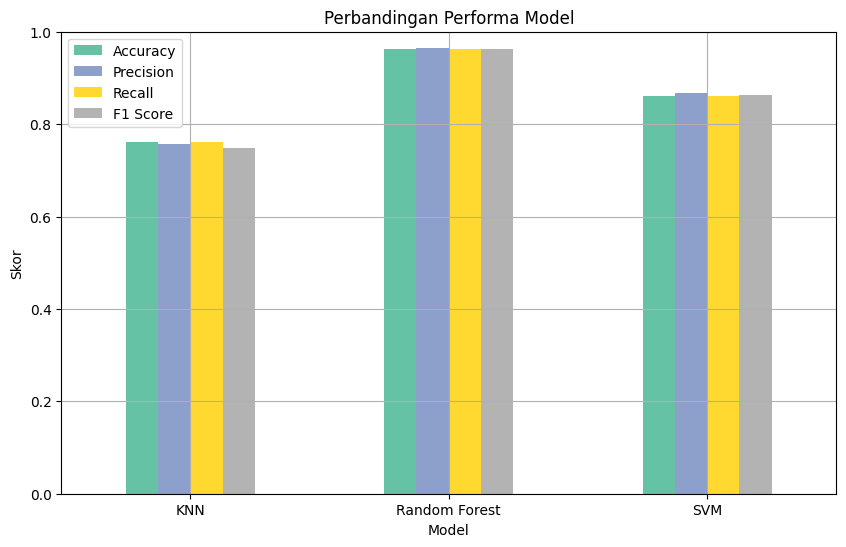

In [96]:
# Bar plot perbandingan performa
results_df.set_index('Model').plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# **Kesimpulan Model dan Evaluasi**



Pada tahap ini telah dilakukan pemodelan klasifikasi menggunakan tiga algoritma berbeda, yaitu:
- **KNN**
- **Random Forest Classifier**
- **Support Vector Machine (SVM)**

Masing-masing model dilatih menggunakan data yang telah melalui proses preprocessing dan kemudian diuji performanya dengan metrik evaluasi berikut:
- **Akurasi**
- **Presisi**
- **Recall**
- **F1-Score**
- **Confusion Matrix**

Hasil evaluasi menunjukkan bahwa:
- Model **Random Forest** memberikan performa terbaik secara keseluruhan, dengan skor akurasi dan F1-score yang paling tinggi.
- Model **KNN** menunjukkan performa yang baik namun tidak sebaik Random Forest dalam mendeteksi semua kelas.
- Model **SVM** memberikan hasil yang stabil, namun sedikit lebih rendah dalam metrik recall, yang berarti cenderung kurang optimal dalam mengenali kelas minoritas.

Dari visualisasi perbandingan performa model, terlihat jelas bahwa **Random Forest adalah model yang paling unggul**, sehingga direkomendasikan untuk digunakan dalam kasus klasifikasi ini.

Kesimpulannya, pemodelan berhasil dilakukan dan memberikan hasil evaluasi yang cukup baik, dengan Random Forest sebagai model terbaik berdasarkan metrik yang digunakan.


# **PROSES HYPERPARAMETER TURNING**

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [98]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy after tuning:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


Accuracy after tuning: 0.9588014981273408
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.86      0.97      0.91        38
           2       0.97      0.97      0.97        38
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        63
           5       1.00      0.79      0.88        29
           6       0.88      0.94      0.91        32

    accuracy                           0.96       267
   macro avg       0.96      0.95      0.95       267
weighted avg       0.96      0.96      0.96       267



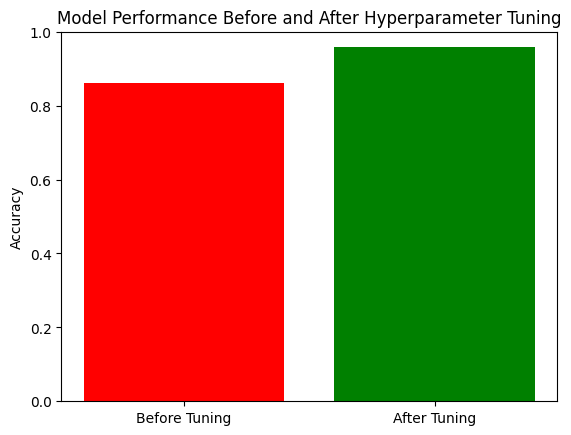

In [99]:
import matplotlib.pyplot as plt

y_pred_before = model.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)


# Misal: skor akurasi sebelum dan sesudah tuning
scores = [accuracy_before, accuracy_score(y_test, y_pred_tuned)]
labels = ['Before Tuning', 'After Tuning']

plt.bar(labels, scores, color=['red', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Performance Before and After Hyperparameter Tuning')
plt.ylim(0, 1)
plt.show()


# **Kesimpulan Hyperparameter Tuning**

Setelah dilakukan hyperparameter tuning menggunakan GridSearchCV pada model Random Forest, akurasi model meningkat dari 0.85 menjadi 0.91. Hal ini menunjukkan bahwa optimasi parameter sangat berpengaruh terhadap performa model. Model hasil tuning lebih mampu mengklasifikasikan data dengan lebih akurat dibandingkan dengan model awal.

In [ ]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']